Für diese Übung verwenden wir Daten aus dem Top-50-Ranking der meistverkauften Bücher auf Amazon in 11 Jahren (von 2009 bis 2019). Der Datensatz ist auf Kaggle.com https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019 öffentlich zugänglich. Laden Sie die CSV-Datei über den Link herunter und verschieben Sie sie in dasselbe Verzeichnis, in dem sich Ihr Arbeitslaptop befindet (der Einfachheit halber). Fahren Sie danach mit der Aufgabe fort

Um diesen Teil der Hausaufgaben zu erledigen, müssen Sie nicht nur Code schreiben, sondern auch verwandte Fragen beantworten. Wo Sie die Antwort fett sehen: Sie müssen die Frage in die Datei einfügen und die Antwort darauf.

Es ist notwendig, Folgendes durchzuführen:

Lesen Sie die CSV-Datei (verwenden Sie die Funktion read_csv)
Ausgabe der ersten fünf Zeilen (Kopffunktion wird verwendet)
Ausgabe der Dimensionen des Datensatzes (Verwendung des Shape-Attributs)
Antwort: Zu wie vielen Büchern werden im Datensatz Daten gespeichert?

In [4]:
import pandas as pd
books=pd.read_csv('bestsellers with categories.csv')
books.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
books.shape #Ausgabe der Dimensionen 
#in Der Datei wurden 550 Bücher gespeichert

(550, 7)

Für jedes der Bücher stehen 7 Variablen (Spalten) zur Verfügung. Schauen wir sie uns genauer an:

- Name - der Name des Buches
- Autor - Autor
- User Rating - Bewertung (auf einer 5-Punkte-Skala)
- Bewertungen - Anzahl der Bewertungen
- Preis - Preis (in Dollar, Stand 2020)
- Jahr - das Jahr, in dem das Buch in die Top 50 aufgenommen wurde
- Genre

Um die weitere Arbeit zu vereinfachen, passen wir die Namen der Variablen ein wenig an. Wie Sie sehen können, beginnen hier alle Namen mit einem Großbuchstaben, einer enthält sogar ein Leerzeichen. Dies ist sehr unerwünscht und kann ziemlich unangenehm sein. Ändern wir die Groß- und Kleinschreibung in Kleinbuchstaben und ersetzen Sie das Leerzeichen durch den Unterstrich (snake_style). Und gleichzeitig wollen wir ein nützliches Attribut des Datenrahmens untersuchen: Spalten (Sie können diesem Attribut einfach eine Liste neuer Namen zuweisen)


df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']


In [6]:
books.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']#Spalten_Namen wurden angepasst
books.head(2)

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction


Primärdatenrecherche

- Prüfen Sie, ob alle Zeilen über genügend Daten verfügen: Geben Sie die Anzahl der Leerzeichen (na) in jeder Spalte aus (verwenden Sie die Funktionen isna und sum)


In [9]:
# Überprüfung, ob alle Zeilen über genügend Daten verfügen
books.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

- Antwort: Gibt es Variablen, die Lücken aufweisen? (Ja/Nein)


In [ ]:
#nein

- Überprüfen Sie, welche Einzelwerte sich in der Spalte "Genre" befinden (verwenden Sie die Funktion "Eindeutig").
- Antwort: Was sind die einzigartigen Genres?


In [12]:
genres_eindeutlich= books['genre'].unique() # ??? oder andere?
print(genres_eindeutlich)
#Antwort steht unten als Array 

['Non Fiction' 'Fiction']



- Schauen Sie sich nun die Preisaufschlüsselung an: Erstellen Sie ein Diagramm (verwenden Sie kind='hist')

- Bestimmen Sie, welchen Preis wir haben: Maximum, Minimum, Durchschnitt, Median (verwenden Sie die Funktionen Max, Min, Mittelwert, Median)

- Antwort: Der Höchstpreis? - 105
- Antwort: Mindestpreis? - 0
- Antwort: Durchschnittspreis? - 13.1
- Antwort: Medianpreis? - 11.0



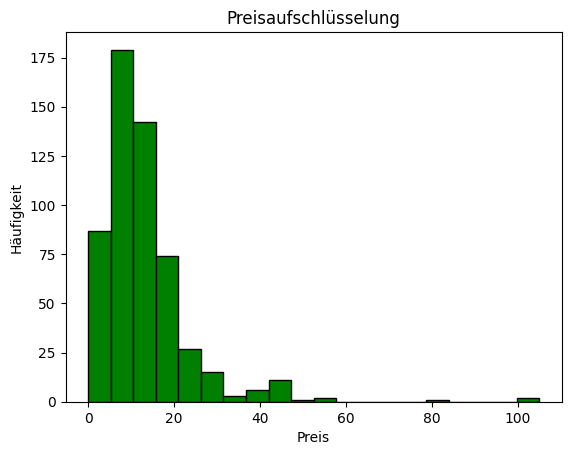

In [32]:
import matplotlib.pyplot as plt

books['price'].plot(kind='hist', bins=20, color='green', edgecolor='black')

plt.title('Preisaufschlüsselung')
plt.xlabel('Preis')
plt.ylabel('Häufigkeit')
plt.show()


<Axes: xlabel='price', ylabel='Count'>

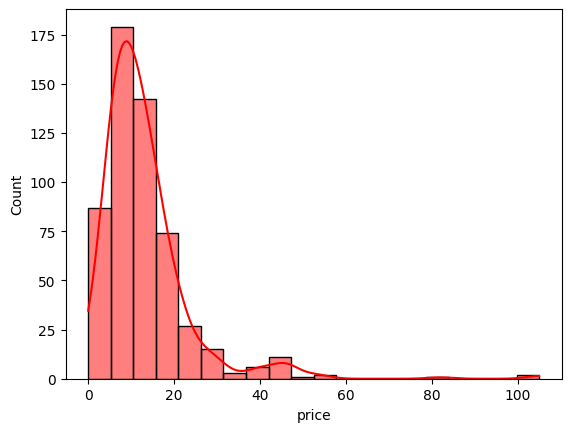

In [36]:
import seaborn as sns
sns.histplot(books['price'], bins=20, color='red', kde=True)

In [26]:
books['price'].describe()

count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: price, dtype: float64

In [21]:
min= books['price'].min()
max=books['price'].max()
mean=books['price'].mean()
median=books['price'].median()
print(f'Die minimale prise ist {min} Euro\nDie maximale prise ist {max} Euro\nDie durchschnittliche prise ist {mean}Euro')
print(f'Median betrachtet {median} Euro')

Die minimale prise ist 0 Euro
Die maximale prise ist 105 Euro
Die durchschnittliche prise ist 13.1Euro
Median betrachtet 11.0 Euro


Suchen und Sortieren von Daten

- Antwort: Was ist die höchste Bewertung in einem Datensatz? Antwort: 4.9
- Antwort: Wie viele Bücher haben diese Bewertung? Antwort: 52
- Antwort: Welches Buch hat die meisten Rezensionen? Antwort: Das Buch "Where the Crawdads Sing" hat die meisten Rezensionen.


In [71]:

high_bewertung=books['user_rating'].max()
print(f'Die höchste Bewertung ist {high_bewertung}')

Die höchste Bewertung ist 4.9


In [73]:
 #52 Bücher haben die höchste Bewertung
print(f'Anzahl der Buecher, die hoehste Bewertung haben: {books[books['user_rating'] == 4.9].shape[0]}')

Anzahl der Buecher, die hoehste Bewertung haben: 52


In [74]:
meist_rez = books[books['reviews'] == books['reviews'].max()]
print('Das Buch mit meisten Rezensionen:')
meist_rez

Das Buch mit meisten Rezensionen:


,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


- Antwort: Welches der Bücher, die es 2015 in die Top 50 geschafft haben, ist das teuerste Buch (Sie können einen Zwischendatenrahmen verwenden)? Antwort: Das Buch mit ID 277 ist am teuerestem.


In [79]:
year_2015 = books[books['year'] == 2015]
max_prise_2015 = year_2015[year_2015['price'] == year_2015['price'].max()]# Max Prise finden(für alle Bücher, die in 2015 erstellt wurden)

year_2015_sort= year_2015.sort_values(by='price', ascending=False)#Top 50, erstes Buch ist am teuersten
print('Top-2015:')
year_2015_sort.head(50)


Top-2015:


,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction
501,Thug Kitchen: The Official Cookbook: Eat Like ...,Thug Kitchen,4.6,11128,23,2015,Non Fiction
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
174,Humans of New York : Stories,Brandon Stanton,4.9,2812,17,2015,Non Fiction
310,StrengthsFinder 2.0,Gallup,4.0,5069,17,2015,Non Fiction
335,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16,2015,Non Fiction
483,The Whole30: The 30-Day Guide to Total Health ...,Melissa Hartwig Urban,4.6,7508,16,2015,Non Fiction
492,The Wright Brothers,David McCullough,4.7,6169,16,2015,Non Fiction
34,Being Mortal: Medicine and What Matters in the...,Atul Gawande,4.8,11113,15,2015,Non Fiction


- Antwort: Wie viele Bücher des Genres Belletristik haben es 2010 in die Top 50 geschafft (use &)? 

Antwort:


In [103]:
year_2010 = books[(books['year'] == 2010) & (books['genre'] == 'Fiction')]

print(f'Anzal der Buecher, die in 2010 mit erstellt wurden und als Genre Belletristik hatten: {year_2010.shape[0]}')

#Für die Kontrolle:
#year_2010_sort= year_2010.sort_values(by='genre', ascending=True)
#year_2010_sort.head(21)
books.head(3)

Anzal der Buecher, die in 2010 mit erstellt wurden und als Genre Belletristik hatten: 20


,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction


- Antwort: Wie viele Bücher mit einer Bewertung von 4,9 haben es in den Jahren 2010 und 2011 in das Ranking geschafft (use | oder die isin-Funktion)? Antwort:


In [108]:
year_2010_2011 = books[((books['year'] == 2010) | (books['year'] == 2011)) & (books['user_rating'] == 4.9)]
print(f'Die Anzahl der Buecher ist {year_2010_2011.shape[0]}')

Die Anzahl der Buecher ist 1


- Und zum Schluss sortieren wir nach Preiserhöhung alle Bücher, die 2015 eingestuft wurden und weniger als 8 US-Dollar kosten (verwenden Sie die Funktion sort_values).
- Antwort: Was ist das letzte Buch auf der sortierten Liste? Antwort: Das Buch mit ID 325

In [117]:
year_2015_weniger_8= books[(books['year'] == 2015) & (books['price'] <= 8)]
sort_price=year_2015_weniger_8.sort_values(by='price', ascending=True)
sort_price.tail(1)


,name,author,user_rating,reviews,price,year,genre
325,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,4.8,25554,8,2015,Non Fiction


Datenaggregation und Tabellenverknüpfung

- Der letzte Abschnitt dieser Hausaufgabe enthält erweiterte Funktionen. Aber keine Sorge, Pandas macht alle Transaktionen einfach und unkompliziert.

- Schauen wir uns zunächst die Höchst- und Mindestpreise für jedes der Genres an (verwenden Sie die Funktionen groupby und agg, verwenden Sie max und min, um die Mindest- und Höchstwerte zu berechnen). Nehmen Sie nicht alle Spalten, sondern wählen Sie nur die Spalten aus, die Sie benötigen


In [119]:
group_genre = books.groupby('genre')
group_genre.ngroups #Anzahl der Groupen

2

In [120]:
group_genre.size()

genre
Fiction        240
Non Fiction    310
dtype: int64

In [123]:
group_genre.describe().transpose() #alle Parametr für jede Gruppe

genre                   Fiction   Non Fiction
user_rating count    240.000000    310.000000
            mean       4.648333      4.595161
            std        0.265123      0.189555
            min        3.300000      4.000000
            25%        4.600000      4.500000
            50%        4.700000      4.600000
            75%        4.800000      4.700000
            max        4.900000      4.900000
reviews     count    240.000000    310.000000
            mean   15683.791667   9065.145161
            std    13984.120890   8606.737629
            min      548.000000     37.000000
            25%     6162.500000   3235.000000
            50%    10922.000000   6346.000000
            75%    21834.000000  11124.250000
            max    87841.000000  61133.000000
price       count    240.000000    310.000000
            mean      10.850000     14.841935
            std        8.572750     12.043241
            min        0.000000      0.000000
            25%        6.000000      8.000000
            50%        9.000000     12.000000
            75%       13.000000     17.000000
            max       82.000000    105.000000
year        count    240.000000    310.000000
            mean    2013.925000   2014.058065
            std        3.142801      3.186214
            min     2009.000000   2009.000000
            25%     2011.000000   2011.000000
            50%     2014.000000   2014.000000
            75%     2017.000000   2017.000000
            max     2019.000000   2019.000000

In [127]:
group_genre['price'].min()

genre
Fiction        0
Non Fiction    0
Name: price, dtype: int64

In [130]:
group_genre.price.agg(['mean', 'median', 'min', 'max'])

,mean,median,min,max
genre,,,,
Fiction,10.850000,9.0,0,82
Non Fiction,14.841935,12.0,0,105


- Antwort: Höchstpreis für das Genre Belletristik: Antwort 82
- Antwort: Mindestpreis für das Genre Belletristik: Antwort 0
- Antwort: Höchstpreis für das Genre Non Fiction: Antwort 105
- Antwort: Mindestpreis für das Genre Non Fiction: Antwort 0

In [132]:
group_genre.price.agg(['min', 'max'])

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


In [133]:
group_genre['price'].max()

genre
Fiction         82
Non Fiction    105
Name: price, dtype: int64


- Erstellen Sie nun einen neuen Datenrahmen, der die Anzahl der Bücher für jeden der Autoren enthält (verwenden Sie die Funktionen groupby und agg, verwenden Sie count, um die Anzahl zu zählen). Nehmen Sie nicht alle Spalten, sondern wählen Sie nur die Spalten aus, die Sie benötigen


In [165]:
anzahl_books = books.groupby('author').agg({'name': 'count'}).reset_index() #reset_index() setzt index zurück

#Spalte name als count umbenennen:
anzahl_books.rename(columns={'name': 'count'}, inplace=True)

print(anzahl_books.head())

                       author  count
0            Abraham Verghese      2
1              Adam Gasiewski      1
2               Adam Mansbach      1
3                   Adir Levy      1
4  Admiral William H. McRaven      1


In [147]:
gr_author=books.groupby('author')

In [149]:
gr_author.size()

author
Abraham Verghese              2
Adam Gasiewski                1
Adam Mansbach                 1
Adir Levy                     1
Admiral William H. McRaven    1
                             ..
Walter Isaacson               3
William Davis                 2
William P. Young              2
Wizards RPG Team              3
Zhi Gang Sha                  2
Length: 248, dtype: int64

In [166]:
anzahl_books.shape

(248, 2)

In [184]:
type(anzahl_books)

pandas.core.frame.DataFrame

- Antwort: Welche Dimension hat die Tabelle? Antwort: 248 Zeilen, 2 Spalten
- Antwort: Welcher Autor hat die meisten Bücher? Antwort: Jeff Kinney
- Antwort: Wie viele Bücher gibt es von diesem Autor? Antwort: 12


In [170]:
anzahl_books_sort = anzahl_books.sort_values(by='count', ascending=False)
anzahl_books_sort

,author,count
120,Jeff Kinney,12
92,Gary Chapman,11
197,Rick Riordan,11
226,Suzanne Collins,11
11,American Psychological Association,10
...,...,...
234,Thomas Piketty,1
232,The Washington Post,1
237,Tina Fey,1
242,W. Cleon Skousen,1


- Erstellen Sie nun einen zweiten Datenrahmen, der die durchschnittliche Bewertung für jeden Autor enthält (verwenden Sie die Funktionen groupby und agg, verwenden Sie den Mittelwert, um den Durchschnitt zu berechnen). Nehmen Sie nicht alle Spalten, sondern wählen Sie nur die Spalten aus, die Sie benötigen


In [181]:
books[books['author']=='Donna Tartt']

,name,author,user_rating,reviews,price,year,genre
392,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20,2013,Fiction
393,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20,2014,Fiction


In [173]:
mean_bewert= books.groupby('author').agg({'user_rating': 'mean'}).reset_index()
mean_bewert.shape

(248, 2)

In [174]:
mean_bewert.head(3)

,author,user_rating
0,Abraham Verghese,4.6
1,Adam Gasiewski,4.4
2,Adam Mansbach,4.8


- Antwort: Welcher Autor hat die niedrigste durchschnittliche Bewertung? Antwort: Donna Taritt
- Antwort: Wie hoch ist die durchschnittliche Bewertung dieses Autors? Antwort: 3.9


In [179]:
mean_sort= mean_bewert.sort_values(by='user_rating', ascending=False)
mean_sort.tail(1)

,author,user_rating
71,Donna Tartt,3.9


- Verbinden Sie die letzten beiden Datenrahmen so, dass die Anzahl der Bücher und die durchschnittliche Bewertung für jeden Autor sichtbar sind (Verwenden Sie die Funktion concat mit dem Parameter axis=1). Speichern des Ergebnisses in einer Variablen
- Sortieren des Datenrahmens nach steigender Anzahl von Büchern und steigender Bewertung (verwenden Sie die Funktion sort_values)
- Antwort: Welcher Autor steht zuerst auf der Liste? JJ Smith

In [195]:
result = pd.concat([books, anzahl_books, mean_bewert], axis=1)
result = result.T.drop_duplicates().T#löschen der Dopplikaten

result.head(2)  
result.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre', 'author', 'count_books', 'group_rating']
result.head(3)

,name,author,user_rating,reviews,price,year,genre,author,count_books,group_rating
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,Abraham Verghese,2.0,4.6
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,Adam Gasiewski,1.0,4.4
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,Adam Mansbach,1.0,4.8


In [198]:
result.sort_values(by=['count_books', 'group_rating'], ascending=False)
result.head(3)

,name,author,user_rating,reviews,price,year,genre,author,count_books,group_rating
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,Abraham Verghese,2.0,4.6
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,Adam Gasiewski,1.0,4.4
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,Adam Mansbach,1.0,4.8
